In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [4]:
url = "C:/Users/Asus/Downloads/archive (5)/NVDA.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [7]:
ts = df['Close'].dropna()

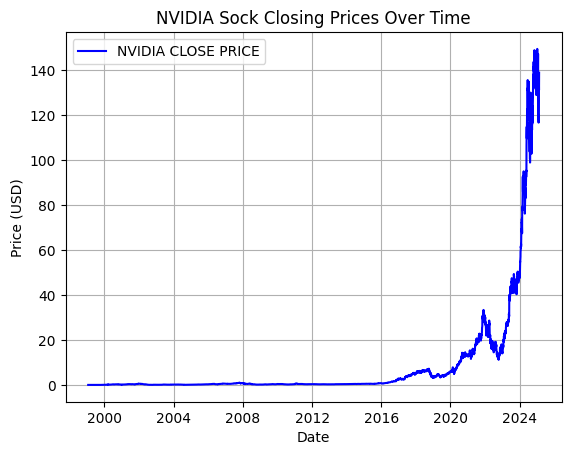

In [8]:
plt.plot(ts,label="NVIDIA CLOSE PRICE",color="blue")
plt.title("NVIDIA Sock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#Check for Stationarity

In [13]:
result = adfuller(ts)
print('ADF Statistic :',result[0])
print('p-value :',result[1])
print('Critical Values :',result[4])

ADF Statistic : 4.619704801876564
p-value : 1.0
Critical Values : {'1%': np.float64(-3.431353047472829), '5%': np.float64(-2.861983261289279), '10%': np.float64(-2.5670059446022853)}


In [14]:
#p-value is not <0.05 , so we have to difference the data

In [15]:
ts_diff = ts.diff().dropna()
result = adfuller(ts_diff)
print("ADF Statistic : ",result[0])
print("p-value : ",result[1])

ADF Statistic :  -13.262650910825748
p-value :  8.338145294555315e-25


In [16]:
#fit ARIMA model

In [17]:
model = ARIMA(ts,order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting au

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6558
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8237.019
Date:                Wed, 07 May 2025   AIC                          16480.038
Time:                        22:56:34   BIC                          16500.403
Sample:                             0   HQIC                         16487.079
                               - 6558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8152      0.007   -120.497      0.000      -0.828      -0.802
ma.L1          0.7379      0.008     94.858      0.000       0.723       0.753
sigma2         0.7222      0.002    474.860      0.0

In [18]:
forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=ts.index[-1]+pd.Timedelta(days=1),periods=30)

C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
forecast_df = pd.DataFrame({'Date':future_dates,'Forecast':forecast})
forecast_df.set_index('Date',inplace=True)

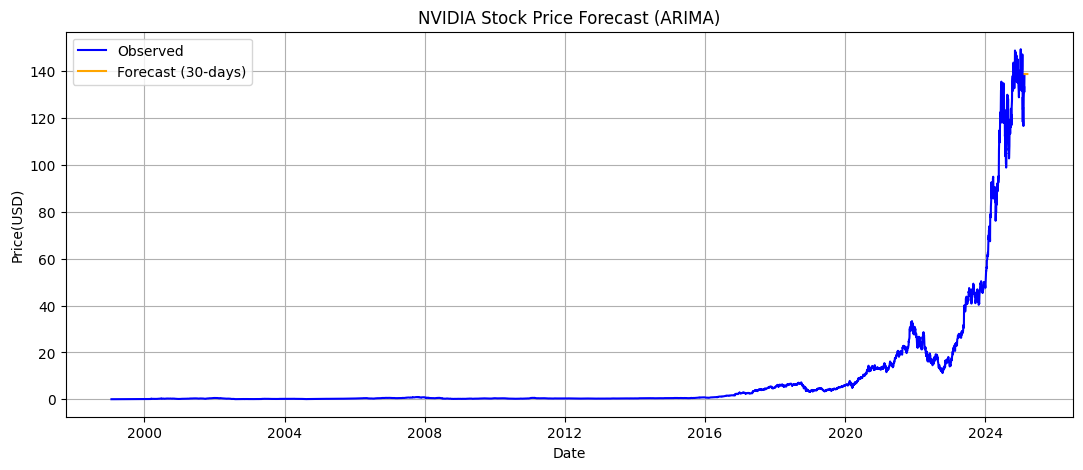

In [25]:
plt.figure(figsize=(13,5))
plt.plot(ts,label='Observed',color='blue')
plt.plot(forecast_df,label='Forecast (30-days)',color='orange')
plt.title('NVIDIA Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()
